## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('mmc4.csv')

In [4]:
df.head()

,date_time,Time,hr,steps,Galvanic skin response,calories,temp,sec,Unnamed: 8
0,15-08-2016 00:00,00:00:00,122.0,0,0.000052,7.5,77.9,0,0.0
1,15-08-2016 00:01,00:01:00,135.0,0,0.000051,8.2,77.9,1,NaN
2,15-08-2016 00:02,00:02:00,111.0,0,0.000052,6.2,77.9,2,NaN
3,15-08-2016 00:03,00:03:00,109.0,0,0.000053,5.6,77.0,3,NaN
4,15-08-2016 00:04,00:04:00,126.0,0,0.000053,9.0,77.0,4,NaN


In [5]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,hr,steps,Galvanic skin response,calories,temp,sec,Unnamed: 8
count,69941.00,73440.00,69921.00,73440.00,69921.00,73440.00,1.00
mean,90.09,5.40,0.09,2.34,87.41,36719.50,0.00
std,14.50,18.68,0.95,1.40,2.63,21200.45,nan
min,39.00,0.00,0.00,1.20,69.80,0.00,0.00
25%,81.00,0.00,0.00,1.50,86.00,18359.75,0.00
50%,91.00,0.00,0.00,2.00,87.80,36719.50,0.00
75%,99.00,0.00,0.00,2.60,88.70,55079.25,0.00
max,187.00,146.00,28.52,19.10,98.60,73439.00,0.00


In [6]:
df['temp'].unique()

array([77.9, 77. , 76.1, 75.2, 74.3, 73.4,  nan, 79.7, 81.5, 82.4, 83.3,
       84.2, 85.1, 86. , 80.6, 86.9, 87.8, 88.7, 89.6, 90.5, 91.4, 92.3,
       93.2, 94.1, 95. , 78.8, 97.7, 98.6, 96.8, 95.9, 70.7, 72.5, 71.6,
       69.8])

In [7]:
df=df.drop('steps', axis=1)

In [8]:
df=df.drop('Time', axis=1)

In [9]:
df=df.drop('sec', axis=1)

In [11]:
df=df.drop('Unnamed: 8', axis=1)

In [12]:
df.head()

,date_time,hr,Galvanic skin response,calories,temp
0,15-08-2016 00:00,122.00,0.00,7.50,77.90
1,15-08-2016 00:01,135.00,0.00,8.20,77.90
2,15-08-2016 00:02,111.00,0.00,6.20,77.90
3,15-08-2016 00:03,109.00,0.00,5.60,77.00
4,15-08-2016 00:04,126.00,0.00,9.00,77.00


In [13]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

2.869553376906318


In [14]:
df.isnull().sum()

date_time                    0
hr                        3499
Galvanic skin response    3519
calories                     0
temp                      3519
dtype: int64

In [15]:
df = df.bfill(axis ='columns')

In [16]:
df.head()

,date_time,hr,Galvanic skin response,calories,temp
0,15-08-2016 00:00,122.00,0.00,7.50,77.90
1,15-08-2016 00:01,135.00,0.00,8.20,77.90
2,15-08-2016 00:02,111.00,0.00,6.20,77.90
3,15-08-2016 00:03,109.00,0.00,5.60,77.00
4,15-08-2016 00:04,126.00,0.00,9.00,77.00


In [17]:
df = df.ffill(axis ='columns')

In [18]:
df.isnull().sum()

date_time                 0
hr                        0
Galvanic skin response    0
calories                  0
temp                      0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize': (25, 7)})

<AxesSubplot:>

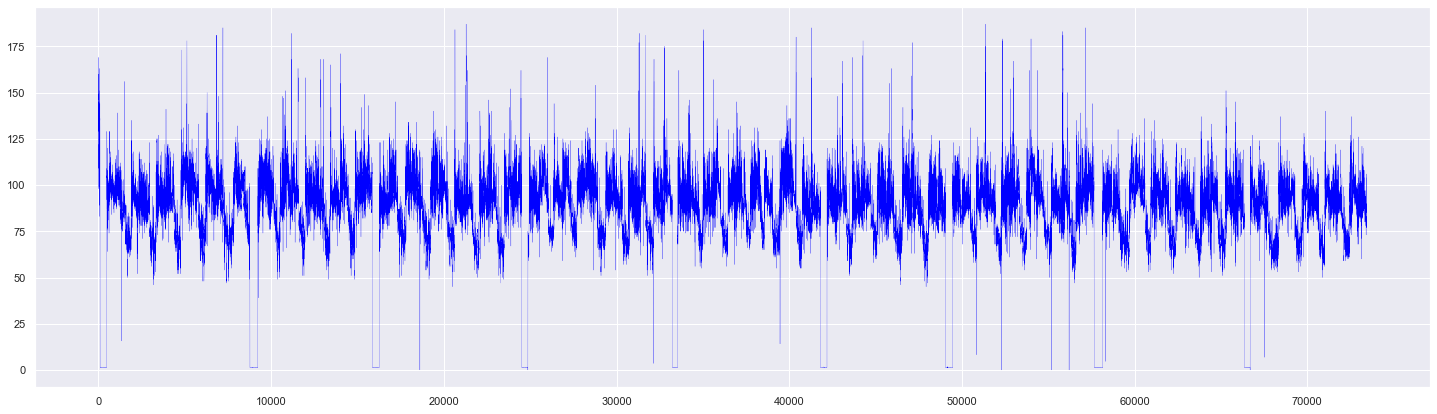

In [20]:
df['hr'].plot(linewidth = 0.2,color='blue')

In [21]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [22]:
df.dtypes

date_time                 datetime64[ns]
hr                               float64
Galvanic skin response           float64
calories                         float64
temp                             float64
dtype: object

In [23]:
# Displaying random sample of 5 rows
df.sample(5, random_state = 0)

,date_time,hr,Galvanic skin response,calories,temp
58898,2016-09-24 21:38:00,93.00,0.00,2.40,87.80
71292,2016-03-10 12:12:00,89.00,0.00,2.20,86.90
10538,2016-08-22 07:38:00,86.00,0.00,1.70,85.10
770,2016-08-15 12:50:00,95.00,0.00,2.10,89.60
66985,2016-09-30 12:25:00,84.00,0.00,1.90,89.60


<AxesSubplot:>

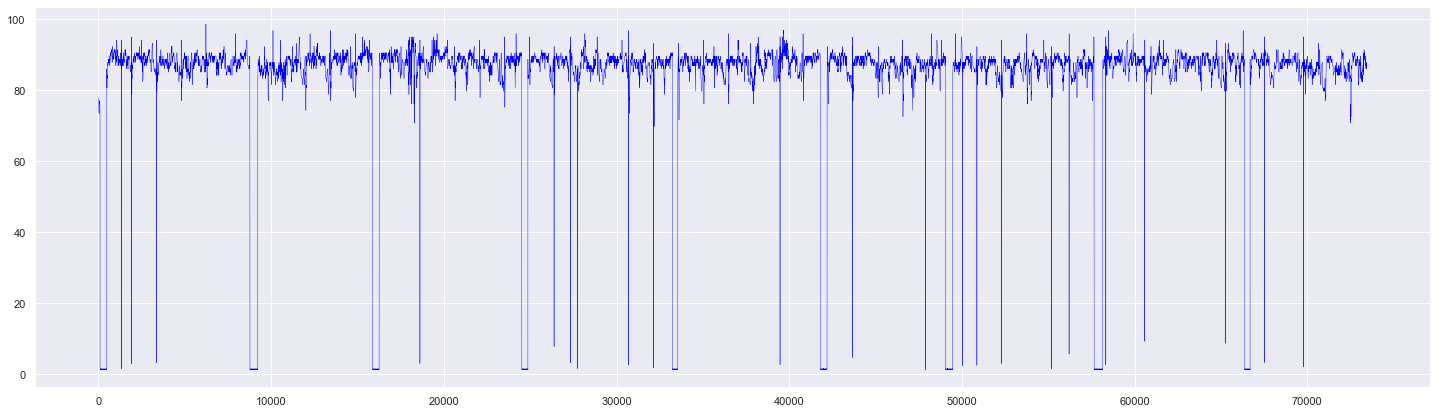

In [24]:
df['temp'].plot(linewidth = 0.4,color='blue')

In [25]:
df['temp'] = np.where(df['temp'].between(0,70), 96.67, df['temp'])

<AxesSubplot:>

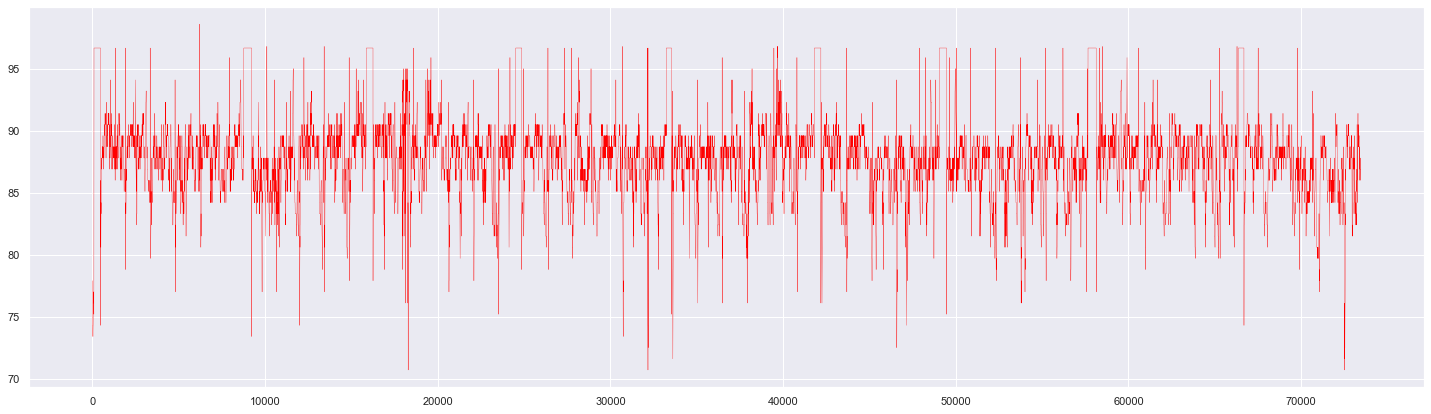

In [26]:
df['temp'].plot(linewidth = 0.3,color='red')

In [27]:
df['temp'].unique()

array([77.9 , 77.  , 76.1 , 75.2 , 74.3 , 73.4 , 96.67, 79.7 , 81.5 ,
       82.4 , 83.3 , 84.2 , 85.1 , 86.  , 80.6 , 86.9 , 87.8 , 88.7 ,
       89.6 , 90.5 , 91.4 , 92.3 , 93.2 , 94.1 , 95.  , 78.8 , 97.7 ,
       98.6 , 96.8 , 95.9 , 70.7 , 72.5 , 71.6 ])

In [28]:
df1 = df.rename(columns = {'date_time': 'ds', 'hr':'hb','Galvanic skin response': 'gsr','calories':'cal','temp':'y'}, inplace = False)

In [29]:
df1.columns = ['ds','hb','gsr','cal','y']
df1.head()

,ds,hb,gsr,cal,y
0,2016-08-15 00:00:00,122.00,0.00,7.50,77.90
1,2016-08-15 00:01:00,135.00,0.00,8.20,77.90
2,2016-08-15 00:02:00,111.00,0.00,6.20,77.90
3,2016-08-15 00:03:00,109.00,0.00,5.60,77.00
4,2016-08-15 00:04:00,126.00,0.00,9.00,77.00


In [30]:
del df1["gsr"]
del df1["cal"]
del df1["hb"]

In [31]:
df1.head()

,ds,y
0,2016-08-15 00:00:00,77.90
1,2016-08-15 00:01:00,77.90
2,2016-08-15 00:02:00,77.90
3,2016-08-15 00:03:00,77.00
4,2016-08-15 00:04:00,77.00


## Model training

In [32]:
from fbprophet import Prophet

In [33]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

## Initialize the Model

In [34]:
model=Prophet()

In [35]:
df1.columns

Index(['ds', 'y'], dtype='object')

In [36]:
model.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [37]:
future_dates=model.make_future_dataframe(periods=365)

In [38]:
prediction=model.predict(future_dates)

In [39]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-09 00:00:00,88.85,86.68,94.54,88.85,88.85,1.95,1.95,1.95,1.08,1.08,1.08,0.87,0.87,0.87,0.00,0.00,0.00,90.80
1,2016-01-09 00:01:00,88.85,87.02,94.79,88.85,88.85,1.94,1.94,1.94,1.07,1.07,1.07,0.87,0.87,0.87,0.00,0.00,0.00,90.80
2,2016-01-09 00:02:00,88.85,86.81,94.58,88.85,88.85,1.94,1.94,1.94,1.07,1.07,1.07,0.87,0.87,0.87,0.00,0.00,0.00,90.79
3,2016-01-09 00:03:00,88.85,86.79,94.57,88.85,88.85,1.94,1.94,1.94,1.06,1.06,1.06,0.87,0.87,0.87,0.00,0.00,0.00,90.79
4,2016-01-09 00:04:00,88.85,86.91,94.83,88.85,88.85,1.93,1.93,1.93,1.06,1.06,1.06,0.88,0.88,0.88,0.00,0.00,0.00,90.78


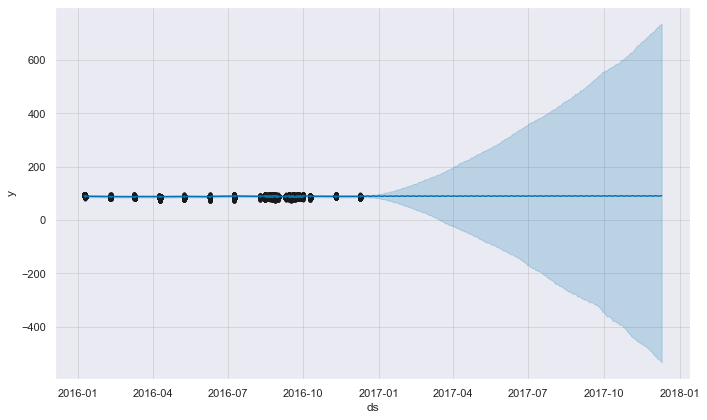

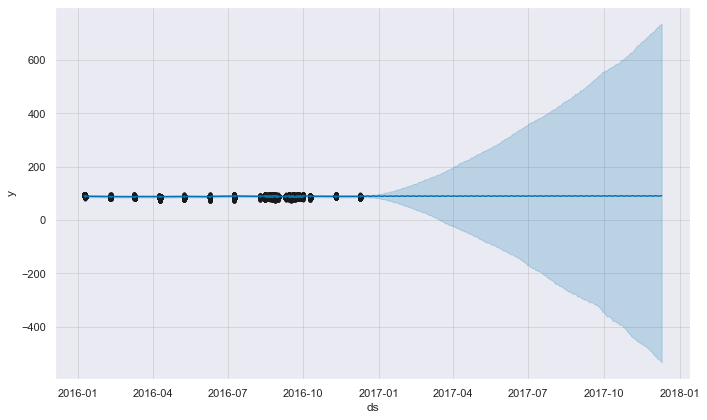

In [41]:
sns.set(rc = {'figure.figsize': (25, 7)})
model.plot(prediction)

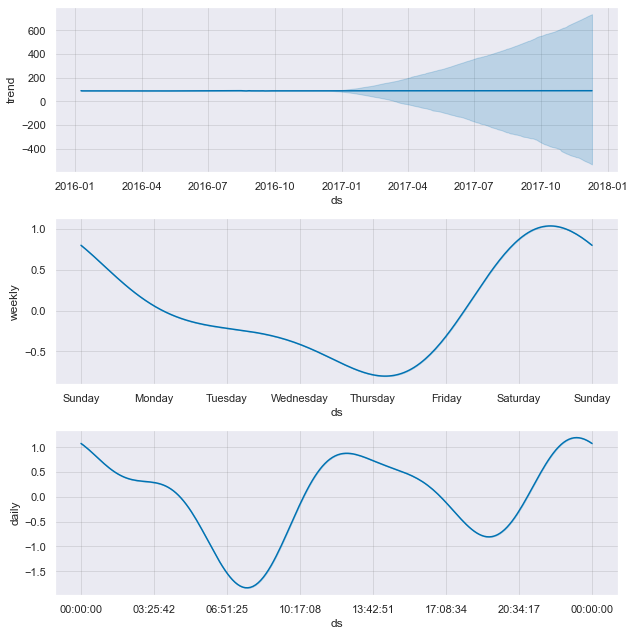

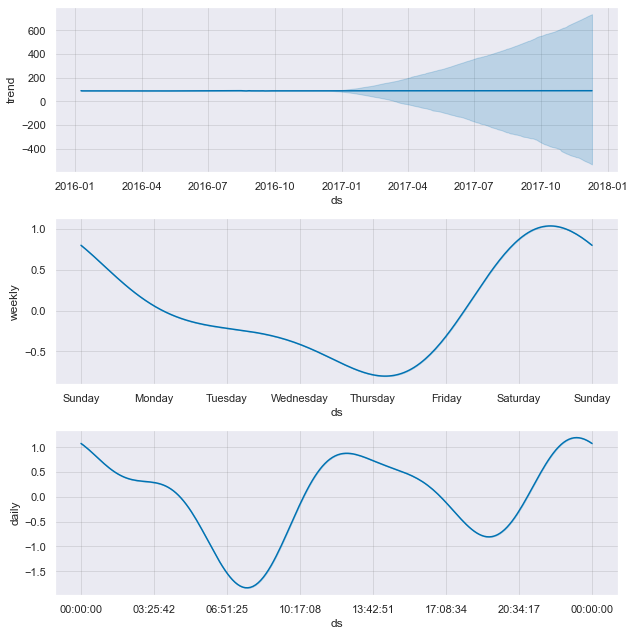

In [42]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [43]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-09 00:00:00,90.80,86.68,94.54
1,2016-01-09 00:01:00,90.80,87.02,94.79
2,2016-01-09 00:02:00,90.79,86.81,94.58
3,2016-01-09 00:03:00,90.79,86.79,94.57
4,2016-01-09 00:04:00,90.78,86.91,94.83


<AxesSubplot:xlabel='ds'>

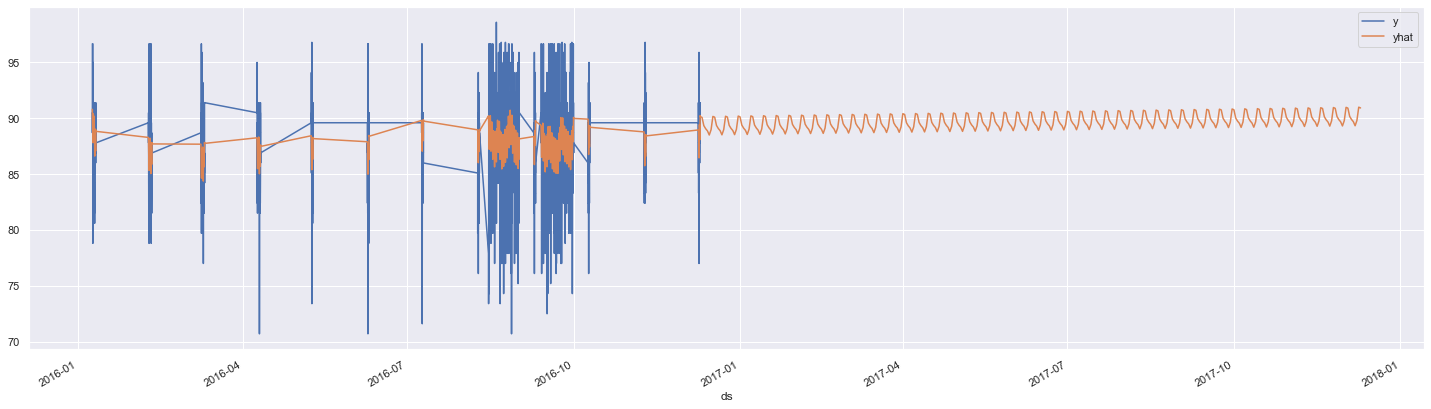

In [44]:
pd.concat([df1.set_index('ds')['y'],prediction.set_index('ds')['yhat']], axis=1).plot()